In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd

In [9]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, Column, Integer, String, Date

# Import and establish Base for which classes will be constructed 
from sqlalchemy.ext.declarative import declarative_base


In [11]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")



In [20]:
# reflect an existing database into a new model
Base = automap_base()

Base.prepare(engine, reflect=True)
Base.classes.keys()


# reflect the tables
Station = Base.classes.station
Measurement = Base.classes.measurement

session = Session(engine)

for row in session.query(Station, Station.name).limit(5).all():
    print(row)


(<sqlalchemy.ext.automap.station object at 0x000001D56D7D9D88>, 'WAIKIKI 717.2, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001D56D7D9EC8>, 'KANEOHE 838.1, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001D56D7D9F48>, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001D56D7D9FC8>, 'PEARL CITY, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001D56D7DF088>, 'UPPER WAHIAWA 874.3, HI US')


In [21]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

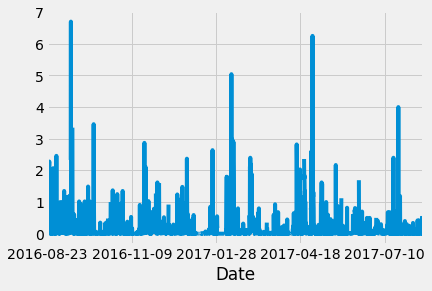

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
engine.execute('SELECT * FROM measurement ORDER BY date DESC LIMIT 1').fetchall()
session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).first()

# Perform a query to retrieve the data and precipitation scores
percList = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
percList = pd.DataFrame(percList,columns=['Station','Date', 'Percipitation', 'Temperature']).set_index('Date')

# Sort the dataframe by date
orderedPercList = percList.sort_values(by=['Date'])
orderedPercList
# Use Pandas Plotting with Matplotlib to plot the data
orderedPercList['Percipitation'].plot()


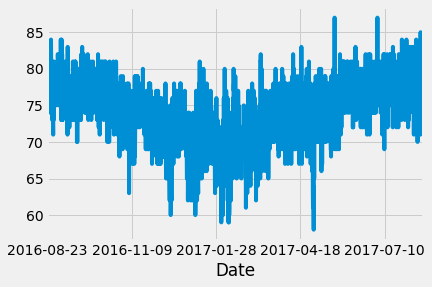

In [58]:
orderedPercList['Temperature'].plot()


In [67]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sumPercList = orderedPercList['Percipitation'].sum()
meanPercList = orderedPercList['Percipitation'].mean()
medianPercList = orderedPercList['Percipitation'].median()
print('sum ', sumPercList, 'mean ', meanPercList, 'median ', medianPercList)

sum  358.28000000000003 mean  0.17727857496288896 median  0.02


In [74]:
# Design a query to show how many stations are available in this dataset?
stationCount = session.query(Station).count()
stationCount

9

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
